# **Nama : Muhammad Akhdaan**
# **Nim : 23.11.5654**
# **Kelas : BDDM 3**

**Instalasi Library**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import joblib

**Upload Dataset**

In [13]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()

Saving dataset_hcv.csv to dataset_hcv (1).csv


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


**Deskripsi Dataset**

In [14]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [15]:
df.isnull().sum()

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1
ALP,18
ALT,1
AST,0
BIL,0
CHE,0


**DATA PREPROCESSING**

In [16]:
#Hapus kolom index
df = df.drop(columns=['Unnamed: 0'])

In [17]:
#Encode kolom Sex dan label target
df['Sex'] = df['Sex'].map({'m': 1, 'f': 0})
df['Category'] = LabelEncoder().fit_transform(df['Category'])

In [18]:
#Handling missing value
df = pd.DataFrame(
    SimpleImputer(strategy='median').fit_transform(df),
    columns=df.columns
)

In [19]:
#Feature dan target
X = df.drop('Category', axis=1)
y = df['Category']

**EDA**

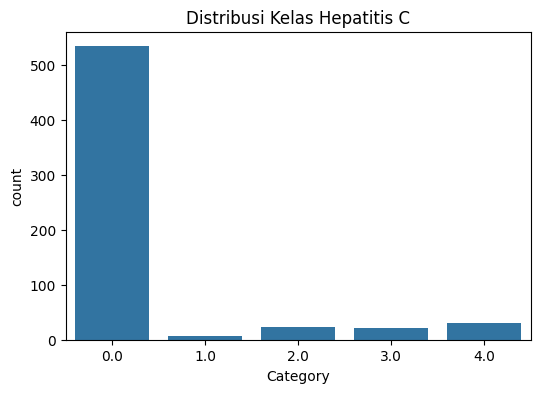

In [20]:
#Distribusi label
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribusi Kelas Hepatitis C")
plt.show()

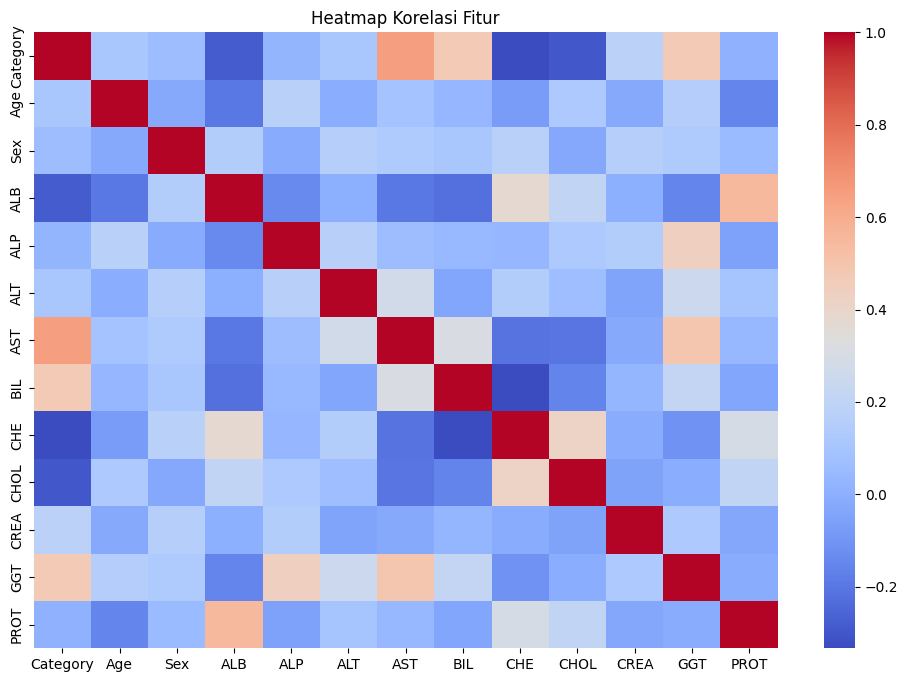

In [21]:
#Korelasi fitur
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

**SELEKSI FITUR**

In [22]:
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X, y)

feature_importance = pd.Series(
    rf_temp.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
AST,0.251504
CHE,0.117549
ALT,0.113014
GGT,0.088072
ALP,0.085311
ALB,0.065056
BIL,0.064214
PROT,0.062177
Age,0.056028
CHOL,0.047855


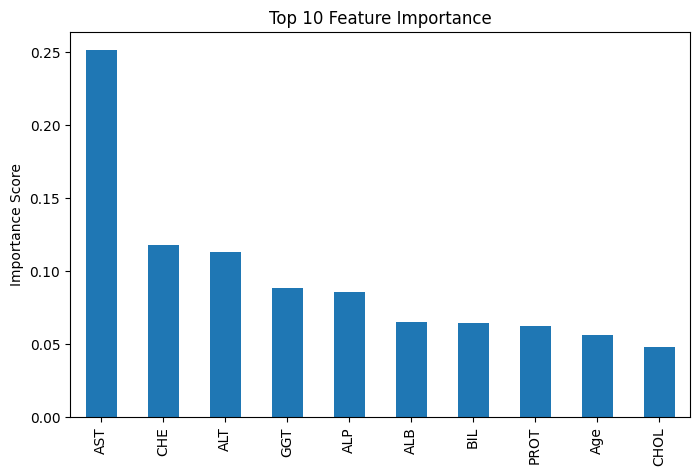

In [23]:
plt.figure(figsize=(8,5))
feature_importance.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importance")
plt.ylabel("Importance Score")
plt.show()

**SPLIT DATA TRAIN DAN TEST**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**HANDLING IMBALANCE DATA**

In [25]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

**MODELING**

In [26]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**EVALUASI MODEL**

In [27]:
#Prediksi
y_pred = rf.predict(X_test)

In [28]:
#Akurasi dan clasiffication report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9512195121951219

Classification Report:

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       107
         1.0       1.00      1.00      1.00         1
         2.0       0.60      0.60      0.60         5
         3.0       0.50      0.50      0.50         4
         4.0       1.00      0.83      0.91         6

    accuracy                           0.95       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.95      0.95      0.95       123



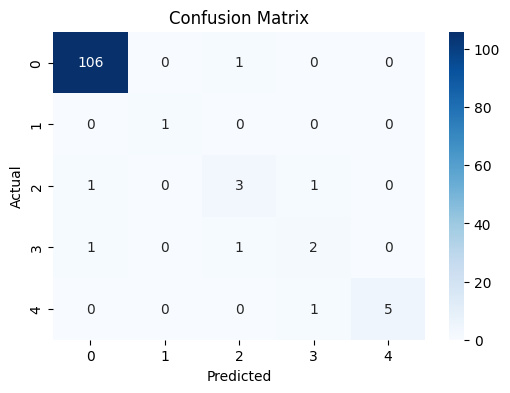

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Simpan model**

In [30]:
joblib.dump(rf, "random_forest_hepatitis_c.pkl")
files.download("random_forest_hepatitis_c.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>